**Домашнее задание №3:**


Домашнее задание:  Разработать конвейер обработки данных (нужна регистрация) с использованием пройденных алгоритмов. Обязательно учтите основные проблемы, рассмотренные на занятиях. Допускается подсматривание в "Notebooks" вкладку, но полное копирование чужого решения будет отслеживаться. Мягкий / жесткий дедлайн: 29.06 и 06.07 (2021).


In [20]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
%matplotlib inline


# Считываем данные
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Edu3 - DS MFTI/Files/HW3 - creditcard.csv').drop_duplicates()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.sample(7)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178652,123718.0,2.233962,-1.536989,-0.437827,-1.653667,-1.561555,-0.260853,-1.537770,0.083257,-1.080328,1.705103,0.370284,-0.520059,-0.351055,-0.250426,-0.475286,0.023226,0.114716,0.441154,0.204752,-0.473656,-0.377872,-0.674951,0.430634,-0.489070,-0.639836,-0.474908,0.031665,-0.050554,13.97,0
271949,164831.0,2.058950,0.027017,-1.104946,0.448258,0.005187,-1.169588,0.313825,-0.422655,0.374059,0.016980,-0.587045,1.182345,1.366606,-0.028592,-0.375740,-0.329597,-0.262050,-1.066223,0.193070,-0.139005,-0.232164,-0.429712,0.267011,0.098797,-0.149296,0.268858,-0.064537,-0.059924,4.60,0
180245,124448.0,2.114734,0.029093,-1.906377,-0.224832,0.763427,-0.666416,0.466549,-0.389581,0.320617,-0.102789,-1.016440,0.782625,1.478527,0.282491,0.636098,-0.039142,-0.776429,-0.491183,0.396679,-0.050743,-0.176892,-0.442395,0.150951,0.060834,0.079942,-0.152739,-0.056019,-0.054107,24.00,0
105747,69669.0,1.222065,-0.557475,0.231881,-0.054993,-0.516954,0.277267,-0.428552,0.064469,-1.007380,0.721892,0.832269,1.174542,0.859190,-0.087526,-0.935557,-1.921382,0.198559,0.722650,-0.506402,-0.423128,-0.432976,-0.627235,-0.038963,-0.270258,0.423935,0.395472,0.005571,0.003752,43.05,0
243846,152098.0,1.970548,-0.760623,-1.671570,-0.637687,1.665290,3.926531,-1.304410,1.058728,1.110590,0.023740,-0.216871,0.371082,-0.022301,-0.062207,0.766940,0.244276,-0.566969,-0.127846,-0.393274,-0.110734,0.160352,0.564189,0.202586,0.759793,-0.245286,0.589136,-0.000253,-0.052949,11.50,0
89482,62597.0,-1.039828,-0.165721,2.342590,-1.775769,-0.063229,-0.773051,0.569534,-0.401884,-0.931898,0.523066,0.280262,-0.953255,-0.266785,-0.723477,0.556961,0.830701,0.191852,-2.079938,-0.343700,0.239642,-0.163138,-0.135917,0.167083,0.361814,0.205340,-0.591880,-0.125411,-0.352111,25.00,0
181480,124994.0,2.140565,-0.829273,-1.196610,-0.408304,-0.451033,-0.201390,-0.644240,-0.061502,0.138152,0.719162,-1.652254,-0.533881,-0.505781,0.140953,0.448785,-1.552944,-0.233629,1.478413,-0.764416,-0.636053,-0.249728,-0.130532,0.146293,0.223889,0.004950,-0.206256,0.022574,-0.041590,21.31,0


In [ ]:
print("**Shape**")
print(df.shape)
print("**Info**")
df.info()

**Shape**
(283726, 31)
**Info**
<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 n

In [ ]:
#Пропусков в данных нет
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

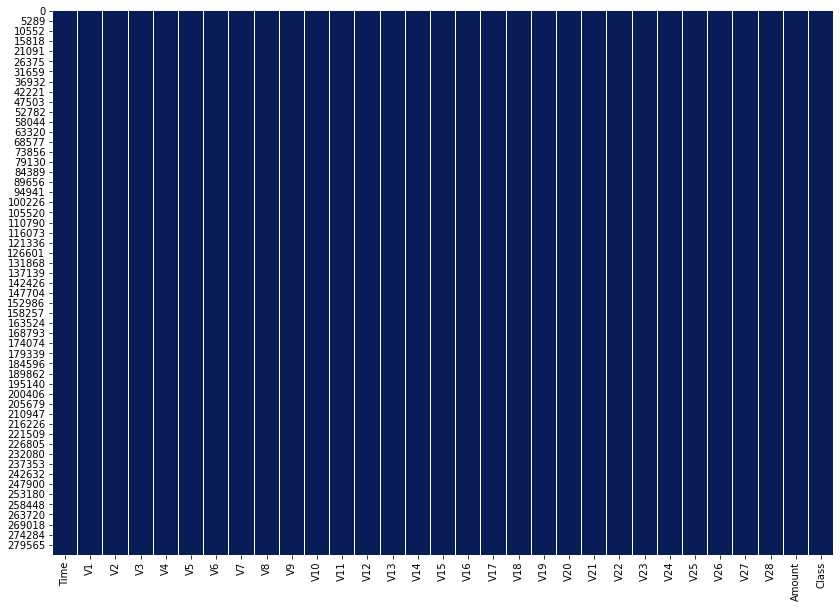

In [ ]:
#Еще один вариант наглядной проверки на null
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu_r")
plt.show()

In [ ]:
#Дубликатов также нет
df.duplicated().sum()

0

In [ ]:
df.describe().T
#Все значения (кроме времени и суммы) имеют похожую картину распределения и медиану значений (-1<x<+1)
#Датасет, скорее всего, был нормализован, о чем и пишется в описании:
#"may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)|


,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Все значения (кроме времени и суммы) имеют похожую картину распределения и медиану значений (-1<x<+1)

In [ ]:
df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7faa25237fd0>,
      dtype=object)

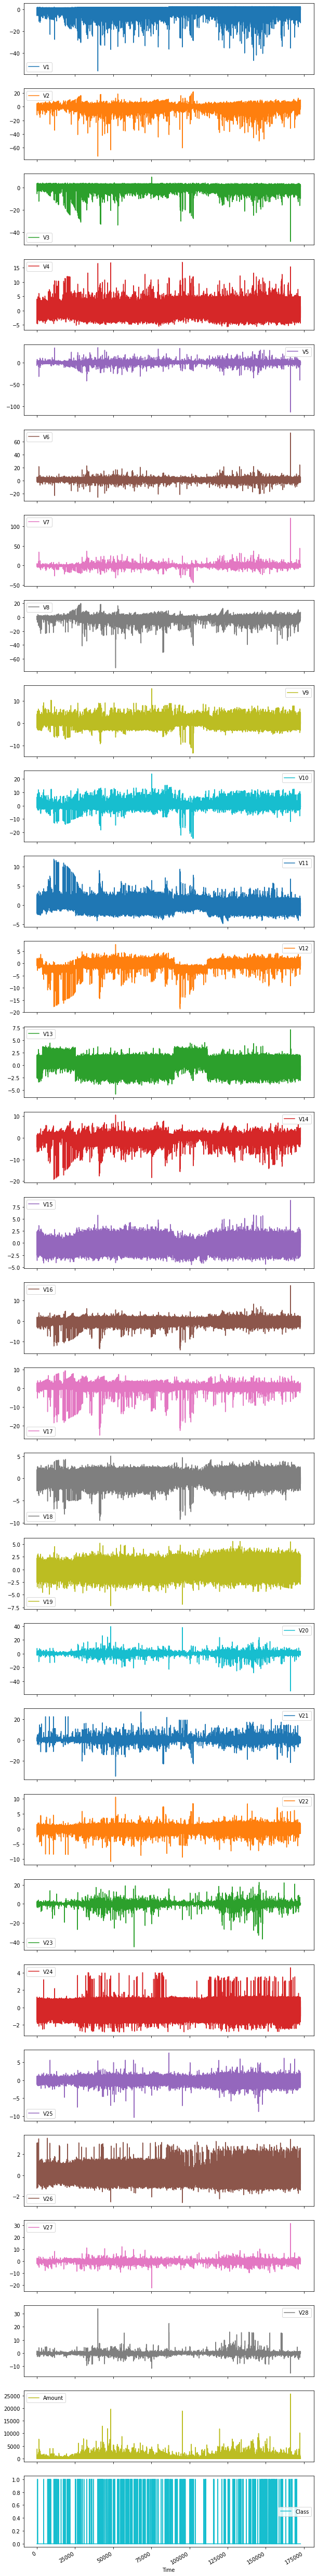

In [ ]:
#df.hist()
#выводит некорректные оси

#наглядное представление значений каждой колонки
#for col in df.columns[1:]:
    #df.plot(x='Time', y=col,  figsize=(5,2))

#визуализируем изменение значений каждой колонки    
df.copy().set_index('Time').plot(subplots=True, figsize = (10, 100), legend=True)


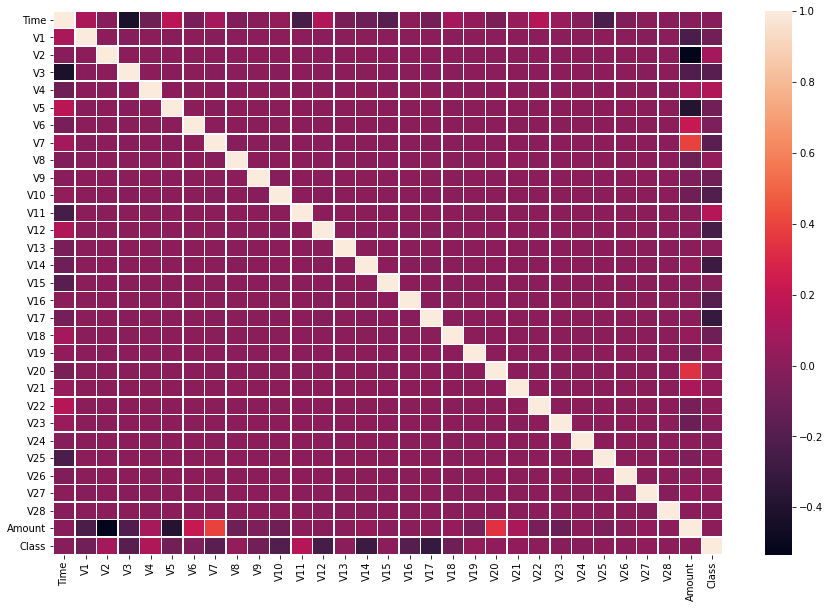

In [ ]:
# Хитмап корелляции
# Прямой зависимоитм V1-V28 и класса не вижу. 
# Эти значения кореллируют только с суммой транзакции
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, 
            annot=False, 
            linewidths=0.5, 
            fmt= ".2f");

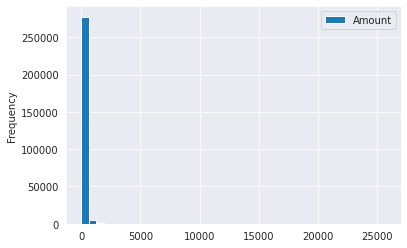

In [ ]:
#Распределение сумм транзакций
#Почти все их них имеют относительно небольшое значение
df['Amount'].plot(kind='hist', bins=40, legend=True)


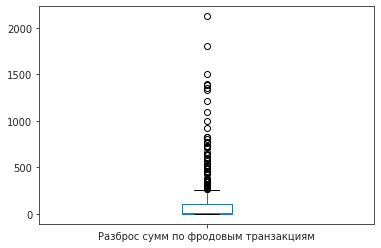

In [ ]:
#Вылеты значений по фродовым значениям в 10 раз меньше
df["Amount"][df.Class==1].plot(kind='box', legend=True, label='Разброс сумм по фродовым транзакциям')


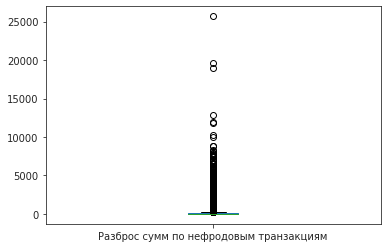

In [ ]:
df["Amount"][df.Class==0].plot(kind='box', legend=True, label='Разброс сумм по нефродовым транзакциям')
#Вылеты значений по фродовым значениям в 10 раз меньше


0    283253
1       473
Name: Class, dtype: int64


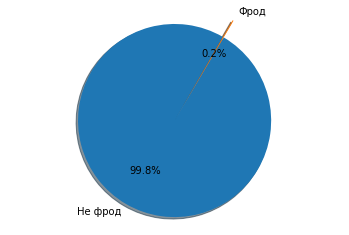

In [ ]:
#Смотрим сбалансированность разбивки output
#Сет крайне несбалансирован, что является типичным для фрод-кейсов
#Это потребует дальнейшей предобработки датасета до скармливания алгоритмам
print(df['Class'].value_counts())

labels = 'Не фрод', 'Фрод'
explode = (0, 0.2)

fig1, ax1 = plt.subplots()
ax1.pie(df['Class'].value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60, )
ax1.axis('equal')
plt.show()

In [ ]:
# Проверяем, что все признаки числовые
# Для данного датасета это очевидно
Categorical_cols = list(set(df.columns) - set(df._get_numeric_data().columns))
Categorical_cols


[]

In [ ]:
#конверсию get dummies не используем, т.к. признаки изначально числовые
#df = load_data() # reset dataframe
#df = pd.get_dummies(df, columns=['Sex', 'Embarked'])

In [21]:
#Подготавливаем dataframe к передаче в массив
#X - выборка без ответа, y - массив с ответами
#x=np.array(df[df.columns[0:30]])
#y=np.array(df['Class'])
x = df.drop('Class', axis = 1)
y = df['Class']

In [22]:
#Стандартизация
#Повышает качество разметки, через приведение значений к едиому масштабу 0<х<1
#Нам это может помочь для снижения веса amount, к-й в разы больше других скалярных значений
#Эффект на примере accuracy логистической регрессии: 0.97 vs 0.98
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [23]:
#Создаем тренировочнкую и тестовую подброки
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x_scaled, y, test_size = 0.25)

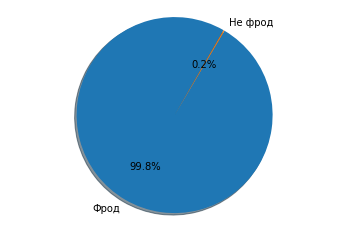

In [24]:
#Проверяем на графике значение до сэмплирования
#Видно, что train-выборка несбалансирована
#train-выборка
labels = 'Фрод', 'Не фрод'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(pd.Series(y_train).value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [25]:
#Будем решать проблему диcбаланса целевого значения через SMOTEEEN
#Выбрал его по причине максимальной популярности
#Альтернатива - Near Miss Algorithm
#!Аугментацию проводим на TRAIN-части, ПОСЛЕ сплита на train/test
from imblearn.combine import SMOTEENN 

sme = SMOTEENN()
x_train_smoted, y_train_smoted = sme.fit_resample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

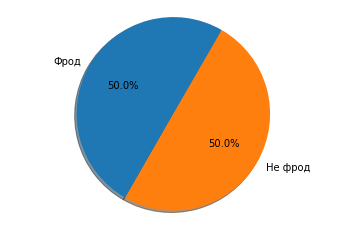

In [ ]:
#Проверяем на графике значения после сэмплирования
#Видно, что train-выборка успешно сбалансировалась относительно целевого значения
labels = 'Фрод', 'Не фрод'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(pd.Series(y_train_smoted).value_counts(), explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=60)
ax1.axis('equal')
plt.show()

In [ ]:
#Проверяем размер выборок
len(x_train), len(y_train), len(y_test), len(x_test),

(212794, 212794, 70932, 70932)

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate 
from sklearn.metrics import classification_report

def model_run(model):
    model.fit(x_train,y_train)
    score = model.score(x_test,y_test)
    print("Accuracy: {}".format(score))

    # classification report
    y_preds = model.predict(x_test)
    print(classification_report(y_test, y_preds))

    #Кросс-валидация должна дать больше точности
    #cv_score2=cross_validate(model,x_train,y_train,cv=5, scoring=['accuracy', 'precision', 'recall', 'f1_micro'])
    #for (k, v) in cv_score2.items():
    #  if not k.find("test"):
    #    print(k, ' : ', np.mean(v))
   

In [ ]:
#Логистическая регрессия
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( max_iter=1000)
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.9805452384489675
#              precision    recall  f1-score   support
#
#           0       0.97      0.99      0.98     65740
#           1       0.99      0.97      0.98     68880
#
#    accuracy                           0.98    134620
#   macro avg       0.98      0.98      0.98    134620
#weighted avg       0.98      0.98      0.98    134620

Accuracy: 0.99908362939153
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.87      0.58      0.69       128

    accuracy                           1.00     70932
   macro avg       0.93      0.79      0.85     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Градиентный бустинг
#98.7%
from xgboost import XGBClassifier
clf = XGBClassifier()
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.987371861536176
#              precision    recall  f1-score   support
#
#           0       0.98      0.99      0.99     65740
#           1       0.99      0.98      0.99     68880

#    accuracy                           0.99    134620
#   macro avg       0.99      0.99      0.99    134620
#weighted avg       0.99      0.99      0.99    134620


Accuracy: 0.999464275644279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.92      0.77      0.84       128

    accuracy                           1.00     70932
   macro avg       0.96      0.89      0.92     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.9998588619818749
#              precision    recall  f1-score   support
#
#           0       1.00      1.00      1.00     65740
#           1       1.00      1.00      1.00     68880
#
#    accuracy                           1.00    134620
#   macro avg       1.00      1.00      1.00    134620
#weighted avg       1.00      1.00      1.00    134620


Accuracy: 0.9994360796255569
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.93      0.74      0.83       128

    accuracy                           1.00     70932
   macro avg       0.97      0.87      0.91     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Решающие деревья
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.9984920517010846
#              precision    recall  f1-score   support
#
#           0       1.00      1.00      1.00     65740
#           1       1.00      1.00      1.00     68880
#
#    accuracy                           1.00    134620
#   macro avg       1.00      1.00      1.00    134620
#weighted avg       1.00      1.00      1.00    134620

Accuracy: 0.9992105114757797
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.81      0.74      0.77       128

    accuracy                           1.00     70932
   macro avg       0.90      0.87      0.89     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Метод ближайших соседей
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
model_run(clf)


#До аугментации только по трейну было:
#Accuracy: 0.9991383152577626
#              precision    recall  f1-score   support
#
#           0       1.00      1.00      1.00     65740
#           1       1.00      1.00      1.00     68880
#
#    accuracy                           1.00    134620
#   macro avg       1.00      1.00      1.00    134620
#weighted avg       1.00      1.00      1.00    134620

Accuracy: 0.9994219816161958
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.91      0.75      0.82       128

    accuracy                           1.00     70932
   macro avg       0.96      0.87      0.91     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Метод поддерживающих векторов
from sklearn.svm import SVC
clf = SVC()
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.9955430099539444
#              precision    recall  f1-score   support
#
#           0       0.99      1.00      1.00     65740
#           1       1.00      0.99      1.00     68880
#
#    accuracy                           1.00    134620
#   macro avg       1.00      1.00      1.00    134620
#weighted avg       1.00      1.00      1.00    134620


Accuracy: 0.9992105114757797
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.94      0.60      0.73       128

    accuracy                           1.00     70932
   macro avg       0.97      0.80      0.87     70932
weighted avg       1.00      1.00      1.00     70932



In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.9271282127469915
#              precision    recall  f1-score   support
#
#           0       0.88      0.98      0.93     65740
#           1       0.98      0.88      0.93     68880
#
#    accuracy                           0.93    134620
#   macro avg       0.93      0.93      0.93    134620
#weighted avg       0.93      0.93      0.93    134620

Accuracy: 0.9777815372469407
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70804
           1       0.06      0.80      0.12       128

    accuracy                           0.98     70932
   macro avg       0.53      0.89      0.55     70932
weighted avg       1.00      0.98      0.99     70932



In [ ]:
#Ada boost
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier()
model_run(clf)

#До аугментации только по трейну было:
#Accuracy: 0.981689199227455
#              precision    recall  f1-score   support
#
#           0       0.97      0.99      0.98     65740
#           1       0.99      0.97      0.98     68880
#
#    accuracy                           0.98    134620
#   macro avg       0.98      0.98      0.98    134620
#weighted avg       0.98      0.98      0.98    134620

Accuracy: 0.9991541194383353
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.80      0.70      0.75       128

    accuracy                           1.00     70932
   macro avg       0.90      0.85      0.87     70932
weighted avg       1.00      1.00      1.00     70932



In [26]:
#Градиентный бустинг
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
model_run(clf)

#Accuracy: 0.9879735551923934
#              precision    recall  f1-score   support
#
#           0       0.98      0.99      0.99     65740
#           1       0.99      0.98      0.99     68880
#
#    accuracy                           0.99    134620
#   macro avg       0.99      0.99      0.99    134620
#weighted avg       0.99      0.99      0.99    134620

Accuracy: 0.9990695313821688
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70811
           1       0.78      0.63      0.70       121

    accuracy                           1.00     70932
   macro avg       0.89      0.81      0.85     70932
weighted avg       1.00      1.00      1.00     70932



In [29]:
#Deep learning with Keras
from keras.models import Sequential
from keras.layers import Dense

#считаем кол-во переменных в модели для настройки input layer
#вычитаем посл.колонку с целевой переменной
numcols=len(df.columns)-1

# Настройка слоев
model = Sequential()
model.add(Dense(12, input_dim=numcols, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
# binary_crossentropy - подходит для классификации 0/1
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy','TrueNegatives', 'TruePositives'])
#model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
# Количество эпох уменьшил до 25 из исходных 150, т.к. можно покрыться пылью, пока colab это посчитает
# На собственном опыте, после 25 эпох точность уже не возрастала
model.fit(x_train, y_train, epochs=20, batch_size=10)


Epoch 1/20
21280/21280 [==============================] - 32s 1ms/step - loss: 0.0521 - accuracy: 0.9776 - true_negatives: 105534.6672 - true_positives: 81.5786
Epoch 2/20
21280/21280 [==============================] - 31s 1ms/step - loss: 0.0033 - accuracy: 0.9994 - true_negatives: 106212.2087 - true_positives: 136.2505
Epoch 3/20
21280/21280 [==============================] - 30s 1ms/step - loss: 0.0031 - accuracy: 0.9994 - true_negatives: 106200.0407 - true_positives: 142.3054
Epoch 4/20
21280/21280 [==============================] - 30s 1ms/step - loss: 0.0026 - accuracy: 0.9994 - true_negatives: 106200.2845 - true_positives: 149.5131
Epoch 5/20
21280/21280 [==============================] - 30s 1ms/step - loss: 0.0027 - accuracy: 0.9994 - true_negatives: 106217.0032 - true_positives: 131.1224
Epoch 6/20
21280/21280 [==============================] - 30s 1ms/step - loss: 0.0025 - accuracy: 0.9995 - true_negatives: 106207.8162 - true_positives: 145.9898
Epoch 7/20
21280/21280 [=====

Результат:

Победил Градиентный бустинг с параметрами:

In [31]:
#Победил Градиентный бустинг c параметрами
Accuracy: 0.999464275644279
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     70804
           1       0.92      0.77      0.84       128

    accuracy                           1.00     70932
   macro avg       0.96      0.89      0.92     70932
weighted avg       1.00      1.00      1.00     70932

Я не стал дополнительно тюнить гиперпараметры моделей, т.к. результат уже очень хороший + при таком кол-ве моделей это могло занять слишком большое кол-во времени, необходимого для выполнения других занятий

Сюда же надо было добавить %time, чтобы понять cost по ресурсам, т.к. это тоже важный параметр в оценке эффективности модели. Не стал делать из-за долгого расчета моделей.

Источники:
1. Ноутбуки лекции
2. https://www.kaggle.com/bakar31/simple-model-works-better-in-fraud-detection
3. https://www.kaggle.com/suyashlakhani/credit-card-fraud-handling-imbalanced-dataset-98
4. https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
5. https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
6. https://towardsdatascience.com/class-imbalance-random-sampling-and-data-augmentation-with-imbalanced-learn-63f3a92ef04a

Настройка Keras

We can piece it all together by adding each layer:

The model expects rows of data with 8 variables (the input_dim=8 argument) The first hidden layer has 12 nodes and uses the relu activation function. The second hidden layer has 8 nodes and uses the relu activation function. The output layer has one node and uses the sigmoid activation function.

Note, the most confusing thing here is that the shape of the input to the model is defined as an argument on the first hidden layer. This means that the line of code that adds the first Dense layer is doing 2 things, defining the input or visible layer and the first hidden layer

We must specify the loss function to use to evaluate a set of weights, the optimizer is used to search through different weights for the network and any optional metrics we would like to collect and report during training.

In this case, we will use cross entropy as the loss argument. This loss is for a binary classification problems and is defined in Keras as “binary_crossentropy“.

We will define the optimizer as the efficient stochastic gradient descent algorithm “adam“. This is a popular version of gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

Finally, because it is a classification problem, we will collect and report the classification accuracy, defined via the metrics argument.

The training process will run for a fixed number of iterations through the dataset called epochs, that we must specify using the epochs argument. We must also set the number of dataset rows that are considered before the model weights are updated within each epoch, called the batch size and set using the batch_size argument.

For this problem, we will run for a small number of epochs (150) and use a relatively small batch size of 10.